In [ ]:
jayfrom google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/project

/content/drive/My Drive/project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
import sklearn.metrics as metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1=pd.read_csv('newDi.csv')

In [ ]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [ ]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,265,208,2177,332,1,1.0,0.0,0.0,0
1,3972,330,2660,485,5,1.0,1.0,1.0,0
2,1185,166,1254,177,0,0.0,0.0,1.0,0
3,60304,2248,202968,981,101,1.0,0.0,1.0,0
4,5,21,82,79,0,0.0,1.0,1.0,0


In [ ]:
df1.shape

(6825, 9)

In [ ]:
X=df1.drop('Is_Fake',axis=1)

In [ ]:
y=df1['Is_Fake']

In [ ]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

In [ ]:
cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.99267578, 0.99072266, 0.98828125, 0.99169922, 0.9921875 ,
       0.9921875 , 0.99414062, 0.99023438, 0.99169922, 0.99121094])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 8)
(2048, 8)
(4777,)
(2048,)


In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction=rf.predict(x_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1074
           1       1.00      0.99      0.99       974

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



In [ ]:
confusion_matrix(y_test,prediction)

array([[1071,    3],
       [  12,  962]])

In [ ]:
fpr, tpr, thresholds=roc_curve(y_test,prediction)

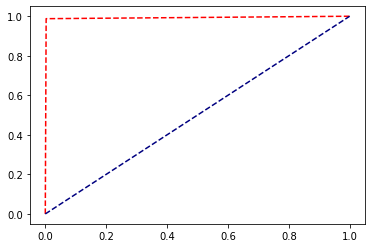

In [ ]:
plt.plot(fpr,tpr,linestyle='--',color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Loss: ",metrics.log_loss(y_test, prediction))

Accuracy: 0.99267578125
Loss:  0.25297072495896133


In [ ]:
import pickle

In [ ]:
%cd Models
with open('randomF.pkl','wb') as f:
    pickle.dump(rf,f)

/content/drive/My Drive/project/Models


In [ ]:
# random forest ---99.26267578125
# Svm -- 91.162109375
# xg boost --99.0234375
#LSTM---97.106919241